# Web scraping with Python

In this notebook I will be using web scraping on the following Amazon webpage for a carbonated water maker (at the time of writing, a Black Friday Week lightning deal (!)): https://www.amazon.co.uk/SodaStream-Sparkling-Refillable-Carbonated-Cylinder/dp/B085J8J3D3/?_encoding=UTF8&smid=A3P5ROKL5A1OLE&pd_rd_w=YnGhT&pf_rd_p=8c420f05-3424-4681-a712-1a8685799b63&pf_rd_r=WNQK3WTR1C1JX8VSR5SE&pd_rd_r=ccdca551-73a6-4194-8673-6c13b65204c5&pd_rd_wg=jmYF7&ref_=pd_gw_unk&th=1. My aim is to create a list of all the reviews and their associated ratings (stars). I will make use of two famous libraries for scraping: `Requests` and `BeautifulSoup`; importing them will be the first step.

## Importing the libraries

In [8]:
import requests
from bs4 import BeautifulSoup

## HTTP GET

Once we have imported the libraries, we need to make an HTTP GET request. In order for the petition to work, we need to set a header, or else Amazon will not allow us to extract the text from the site. This is the header that worked for me.

In [15]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/536.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
petition = requests.get('https://www.amazon.co.uk/SodaStream-Sparkling-Refillable-Carbonated-Cylinder/dp/B085J8J3D3/?_encoding=UTF8&smid=A3P5ROKL5A1OLE&pd_rd_w=YnGhT&pf_rd_p=8c420f05-3424-4681-a712-1a8685799b63&pf_rd_r=WNQK3WTR1C1JX8VSR5SE&pd_rd_r=ccdca551-73a6-4194-8673-6c13b65204c5&pd_rd_wg=jmYF7&ref_=pd_gw_unk&th=1',headers = headers)

We can look at the petition status code to check if everything is correct. 

In [16]:
petition.status_code

200

If we get a status code of 200 it means that everything is correct. We can now check the website source code:

<!doctype html><html lang="en-gb" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>

<script type='text/javascript'>var ue_t0=ue_t0||+new Date();</script>
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<script type='text/javascript'>
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])
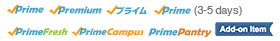
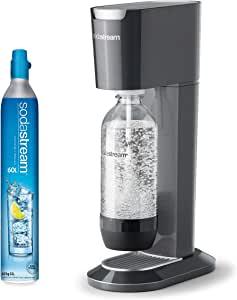

In [17]:
source_code = petition.text
print(source_code)

## Beautiful Soup

We will now make use of `Beautiful Soup`, so as to make something out of the source code. We first need to create a BeautifulSoup object.

In [18]:
bs = BeautifulSoup(source_code, 'lxml')

We have used the `lxml` parser because it is very fast; there are other options listed [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser). We can now use *find_all* to extract the reviews and place them inside a list. If we look at the HTML we can see that the reviews can be found inside `div` and with the class `a-section review aok-relative`.

In [26]:
reviews = list(bs.find_all("div", class_ = "a-section review aok-relative"))

In [27]:
print(reviews)

[<div class="a-section review aok-relative" data-hook="review" id="R1GWQIP0XUCVTU"><div class="a-row a-spacing-none" id="R1GWQIP0XUCVTU-review-card"><div class="a-section celwidget" id="customer_review-R1GWQIP0XUCVTU"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AFY24KQGZI6JKG2Y4BQ34QFRSKZQ/ref=cm_cr_dp_d_gw_tr?ie=UTF8"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Jamie</span></div></a></div><div class="a-row"><a class="a

## Stars

We need to filter out the extra HTML code from the list, and keep only the reviews and the number of stars. If we inspect the stars' code we can see that they are inside `span` elements and have a `class=a-icon-alt`. Thus, using list comprehension, we can easily list the ratings associated to the reviews.

In [30]:
ratings = [reviews.find('span', class_ = "a-icon-alt").get_text(" ") for reviews in reviews]

In [31]:
ratings

['5.0 out of 5 stars',
 '2.0 out of 5 stars',
 '4.0 out of 5 stars',
 '4.0 out of 5 stars',
 '1.0 out of 5 stars',
 '5.0 out of 5 stars',
 '1.0 out of 5 stars',
 '3.0 out of 5 stars']

We only want to keep the number of stars; we can do this using list comprehension once again.

In [36]:
stars = [ratings[:3] for ratings in ratings]

In [37]:
stars

['5.0', '2.0', '4.0', '4.0', '1.0', '5.0', '1.0', '3.0']

## Reviews

We finally have the stars in a list. Now we have to extract the text from the reviews. We follow the same procedure, inspecting the HTML code and choosing the `class`.

In [38]:
text = [reviews.find('div',class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content").text for reviews in reviews]

In [39]:
text

["\n\n  I read through quite a lot of negative reviews and was very hesitant but thought, I'll give it a go myself.- A lot of people were saying they weren't getting fizz from it, i can only assume they were using it incorrectly as I got a fantastic fizz from it! Really powerful and took seconds, also stayed fizzy for a very long time.- It looks great, it fits into the kitchen's asthetiques easily and the build quality is very niceAll i can say is that it works very well so give it a go!\n\n",
 "\n\n  In late July, I bought this as a gift for my husband since he drinks a lot of sparkling water. We were keen on trying the Soda Stream out, since it would reduce considerably the plastic we would be generating. However, after only three uses, we have to physically hold the bottle in place and also contend with a spray of water each time we press the top button. Plus, releasing the bottle from the machine requires a lot of strength (and the constant fear we will break the whole thing!). Ove

We finally have the reviews themselves, with some `\n` elements we need to filter out. We can use `.strip` to clean the reviews:

In [40]:
clean_text = [text.strip('\n') for text in text]

In [41]:
clean_text

["  I read through quite a lot of negative reviews and was very hesitant but thought, I'll give it a go myself.- A lot of people were saying they weren't getting fizz from it, i can only assume they were using it incorrectly as I got a fantastic fizz from it! Really powerful and took seconds, also stayed fizzy for a very long time.- It looks great, it fits into the kitchen's asthetiques easily and the build quality is very niceAll i can say is that it works very well so give it a go!",
 "  In late July, I bought this as a gift for my husband since he drinks a lot of sparkling water. We were keen on trying the Soda Stream out, since it would reduce considerably the plastic we would be generating. However, after only three uses, we have to physically hold the bottle in place and also contend with a spray of water each time we press the top button. Plus, releasing the bottle from the machine requires a lot of strength (and the constant fear we will break the whole thing!). Overall, we're 

The final step is now to join the two lists, so as to have the reviews and the ratings together. We can use the `zip` function:

In [42]:
reviews_ratings = list(zip(stars, clean_text))

In [43]:
reviews_ratings

[('5.0',
  "  I read through quite a lot of negative reviews and was very hesitant but thought, I'll give it a go myself.- A lot of people were saying they weren't getting fizz from it, i can only assume they were using it incorrectly as I got a fantastic fizz from it! Really powerful and took seconds, also stayed fizzy for a very long time.- It looks great, it fits into the kitchen's asthetiques easily and the build quality is very niceAll i can say is that it works very well so give it a go!"),
 ('2.0',
  "  In late July, I bought this as a gift for my husband since he drinks a lot of sparkling water. We were keen on trying the Soda Stream out, since it would reduce considerably the plastic we would be generating. However, after only three uses, we have to physically hold the bottle in place and also contend with a spray of water each time we press the top button. Plus, releasing the bottle from the machine requires a lot of strength (and the constant fear we will break the whole thi

# Web scraping function

We've completed our goal of extracting the ratings and reviews of a product on Amazon! This information would be useful for further studies such as sentiment analysis, but we will stop here. However, in order to facilitate further web scraping in Amazon, we can define a function that will carry out all of these steps, where we input the link to the product and will provide us with its ratings and its reviews.

In [47]:
def amazon_scraping(link):
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/536.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
    petition = requests.get(link,headers = headers)
    source_code = petition.text
    bs = BeautifulSoup(source_code, 'lxml')
    reviews = list(bs.find_all("div", class_ = "a-section review aok-relative"))
    ratings = [reviews.find('span', class_ = "a-icon-alt").get_text(" ") for reviews in reviews]
    stars = [ratings[:3] for ratings in ratings]
    text = [reviews.find('div',class_="a-expander-content reviewText review-text-content a-expander-partial-collapse-content").text for reviews in reviews]
    clean_text = [text.strip('\n') for text in text]
    reviews_ratings = list(zip(stars, clean_text))
    print(reviews_ratings)

Let's try it out with a product I have been meaning to buy myself, the Blu-ray for Abel Ferrara's magnificent crime thriller 'King of New York' (https://www.amazon.co.uk/King-York-Blu-ray-Christopher-Walken/dp/B08GVD789L/ref=sr_1_2?dchild=1&keywords=king+of+new+york&qid=1606150687&sr=8-2)

In [48]:
amazon_scraping('https://www.amazon.co.uk/King-York-Blu-ray-Christopher-Walken/dp/B08GVD789L/ref=sr_1_2?dchild=1&keywords=king+of+new+york&qid=1606150687&sr=8-2')

[('3.0', '  A drug baron helping a hospital - there\'s ironic, but this was neither serious nor amusing, so it kinda fell flat.Walken was brillianct as was to be expected, Snipes, a little OTT, but the rest was comic-book stuff.  Note Steve Buscemi in a tiny role.."Didn\'t he do well" in later years!  The "Bad Cop" wanted a good slap.I really wanted to enjoy this, but sadly, not one to watch again.  It could have so nearly been right up there..If you want comic-book baddies, watch "The Crow", if you want serious, try "Black Mass" or "A History of Violence".., in fact there is so much out there...Can\'t win em all..'), ('5.0', "  Classic of 90s cinema. The director abel ferrara (also director of the stunning bad lieutenant) made tough films with more attitude than was popular at the time. I'm glad his films now have the respect they deserve and Christopher walken gives possibly his best performance"), ('4.0', '  This is set in the 1980s wand cocaine is where the money is being made. Chr